# Square Enix Data Analysis 

### Importing Libraries

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### Importing Data 

In [44]:
purchase_df = pd.read_excel("Case Study_Purchase Data (1).xlsx")
website_df = pd.read_excel("Case Study_Website Data (2).xlsx")

In [45]:
purchase_df.head()

,date,UserID,itemCategory,itemPrice
0,2025-01-23 04:33:42,53908613,Books,60
1,2025-01-17 23:57:02,72710441,Accessories,120
2,2025-01-18 23:48:37,35137612,Music,50
3,2025-01-06 19:00:10,68038425,Music,50
4,2025-01-10 22:43:30,34987764,Figurines,50


In [46]:
website_df.head()

,date,UserID,Campaign Name,source,platform,device,pagesVisited,timeOnSite
0,2025-01-14 17:50:34,52677213,Summon Savings,Email,Email,desktop,6,598
1,2025-01-04 06:44:25,17650652,Moogle Merch Mania,Paid Search,Google,mobile,3,272
2,2025-01-17 02:28:26,96964816,Summon Savings,Paid Search,Google,mobile,3,107
3,2025-01-13 03:27:57,51304201,Summon Savings,Email,Email,desktop,1,319
4,2025-01-19 21:15:24,72438156,Aeris Weekend Deals,Social,IG,mobile,6,485


### Basic Understanding of Data 

In [47]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          250 non-null    datetime64[ns]
 1   UserID        250 non-null    int64         
 2   itemCategory  250 non-null    object        
 3   itemPrice     250 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ KB


In [48]:
website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2000 non-null   datetime64[ns]
 1   UserID         2000 non-null   int64         
 2   Campaign Name  2000 non-null   object        
 3   source         2000 non-null   object        
 4   platform       2000 non-null   object        
 5   device         2000 non-null   object        
 6   pagesVisited   2000 non-null   int64         
 7   timeOnSite     2000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 125.1+ KB


### Statistical Summary 

In [49]:
website_df.describe()

,date,UserID,pagesVisited,timeOnSite
count,2000,2.000000e+03,2000.000000,2000.000000
mean,2025-01-14 13:50:20.387499776,5.021597e+07,7.454500,371.554500
min,2025-01-01 00:08:39,1.191500e+04,0.000000,0.000000
25%,2025-01-07 10:06:32.750000128,2.502535e+07,3.000000,162.750000
50%,2025-01-14 06:57:05.500000,5.031350e+07,7.000000,368.000000
75%,2025-01-21 19:18:06.500000,7.489998e+07,11.000000,574.000000
max,2025-01-28 17:48:55,9.998560e+07,15.000000,870.000000
std,NaN,2.909333e+07,4.589604,239.290752


In [50]:
purchase_df.describe()

,date,UserID,itemPrice
count,250,2.500000e+02,250.000000
mean,2025-01-14 09:02:32.400000,4.943709e+07,56.720000
min,2025-01-01 01:11:09,1.101550e+05,10.000000
25%,2025-01-07 12:42:51,2.323668e+07,30.000000
50%,2025-01-14 12:03:51.500000,4.949033e+07,45.000000
75%,2025-01-20 16:13:16.750000128,7.473086e+07,60.000000
max,2025-01-28 17:48:55,9.927429e+07,200.000000
std,NaN,2.906279e+07,44.638683


### Merging the two tables

### Joining on USER ID 

In [51]:
combined_df = purchase_df.merge(website_df, on="UserID", suffixes=('_p', '_w'))
combined_df.head(5)

,date_p,UserID,itemCategory,itemPrice,date_w,Campaign Name,source,platform,device,pagesVisited,timeOnSite
0,2025-01-23 04:33:42,53908613,Books,60,2025-01-23 04:33:42,ChocoBOGO,Social,FB,mobile,14,757
1,2025-01-17 23:57:02,72710441,Accessories,120,2025-01-17 23:57:02,ChocoBOGO,Paid Search,Bing,mobile,4,190
2,2025-01-18 23:48:37,35137612,Music,50,2025-01-18 23:48:37,Aeris Weekend Deals,Email,Email,mobile,11,425
3,2025-01-06 19:00:10,68038425,Music,50,2025-01-06 19:00:10,ChocoBOGO,Paid Search,Google,mobile,11,425
4,2025-01-10 22:43:30,34987764,Figurines,50,2025-01-10 22:43:30,Final Sale-tasy,Email,Email,mobile,14,423


### Full Outer Join

In [52]:
merged_df = pd.merge(website_df, purchase_df, on=["UserID", "date"], how="outer")
merged_df.head(5)

,date,UserID,Campaign Name,source,platform,device,pagesVisited,timeOnSite,itemCategory,itemPrice
0,2025-01-14 17:50:34,52677213,Summon Savings,Email,Email,desktop,6,598,Music,50.0
1,2025-01-04 06:44:25,17650652,Moogle Merch Mania,Paid Search,Google,mobile,3,272,NaN,NaN
2,2025-01-17 02:28:26,96964816,Summon Savings,Paid Search,Google,mobile,3,107,NaN,NaN
3,2025-01-13 03:27:57,51304201,Summon Savings,Email,Email,desktop,1,319,NaN,NaN
4,2025-01-19 21:15:24,72438156,Aeris Weekend Deals,Social,IG,mobile,6,485,NaN,NaN


###  Step 1. Merged DF info

In [53]:
merged_df_info = merged_df.info()
merged_df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2015 non-null   datetime64[ns]
 1   UserID         2015 non-null   int64         
 2   Campaign Name  2015 non-null   object        
 3   source         2015 non-null   object        
 4   platform       2015 non-null   object        
 5   device         2015 non-null   object        
 6   pagesVisited   2015 non-null   int64         
 7   timeOnSite     2015 non-null   int64         
 8   itemCategory   250 non-null    object        
 9   itemPrice      250 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 157.6+ KB


### Step 2. Check for Missing Values

In [54]:
merged_df_missing = merged_df.isnull().sum()
merged_df_missing

date                0
UserID              0
Campaign Name       0
source              0
platform            0
device              0
pagesVisited        0
timeOnSite          0
itemCategory     1765
itemPrice        1765
dtype: int64

In [55]:
missing_values_df = merged_df[merged_df.isnull().any(axis=1)]
missing_values_df

,date,UserID,Campaign Name,source,platform,device,pagesVisited,timeOnSite,itemCategory,itemPrice
1,2025-01-04 06:44:25,17650652,Moogle Merch Mania,Paid Search,Google,mobile,3,272,NaN,NaN
2,2025-01-17 02:28:26,96964816,Summon Savings,Paid Search,Google,mobile,3,107,NaN,NaN
3,2025-01-13 03:27:57,51304201,Summon Savings,Email,Email,desktop,1,319,NaN,NaN
4,2025-01-19 21:15:24,72438156,Aeris Weekend Deals,Social,IG,mobile,6,485,NaN,NaN
5,2025-01-15 14:46:50,42901851,Materia Madness,Email,Email,desktop,2,240,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2010,2025-01-22 17:08:33,84882424,Final Sale-tasy,Paid Search,Google,mobile,1,532,NaN,NaN
2011,2025-01-04 09:39:22,88343720,Materia Madness,Paid Search,Google,desktop,14,237,NaN,NaN
2012,2025-01-23 21:44:16,62253603,Moogle Merch Mania,Social,IG,mobile,14,486,NaN,NaN
2013,2025-01-26 22:06:20,10952840,Materia Madness,Social,FB,mobile,14,73,NaN,NaN


### Step 3: Summary Statistics for Numerical Columns

In [56]:
summary_statistics = merged_df.describe()
summary_statistics

,date,UserID,pagesVisited,timeOnSite,itemPrice
count,2015,2.015000e+03,2015.000000,2015.000000,250.000000
mean,2025-01-14 12:59:56.747394816,5.018649e+07,7.460050,372.326551,56.720000
min,2025-01-01 00:08:39,1.191500e+04,0.000000,0.000000,10.000000
25%,2025-01-07 09:41:08,2.494817e+07,3.000000,164.000000,30.000000
50%,2025-01-14 06:02:14,5.032754e+07,7.000000,368.000000,45.000000
75%,2025-01-21 18:11:40.500000,7.483499e+07,11.000000,575.500000,60.000000
max,2025-01-28 17:48:55,9.998560e+07,15.000000,870.000000,200.000000
std,NaN,2.906919e+07,4.595588,239.233138,44.638683


### I.  Date Analysis 

In [57]:
# a. Total Unique Dates 

total_unique_dates = merged_df['date'].nunique()
total_unique_dates 


1998

In [58]:
# b. Min and max dates

min_date = merged_df['date'].min()
max_date = merged_df['date'].max()

min_date, max_date 

(Timestamp('2025-01-01 00:08:39'), Timestamp('2025-01-28 17:48:55'))

In [59]:
# 3. Number of users on each date

users_per_date = merged_df.groupby("date")['UserID'].nunique().reset_index()
users_per_date.columns = ['date', 'Unique Users']
users_per_date 

,date,Unique Users
0,2025-01-01 00:08:39,1
1,2025-01-01 00:10:27,1
2,2025-01-01 00:22:37,1
3,2025-01-01 00:59:05,1
4,2025-01-01 01:00:33,1
...,...,...
1993,2025-01-28 15:32:31,1
1994,2025-01-28 17:17:18,1
1995,2025-01-28 17:38:12,1
1996,2025-01-28 17:39:50,1


In [60]:
# 4. Number of users on min and max dates

users_on_min_date = users_per_date[users_per_date['date'] == min_date]['Unique Users'].values[0]
users_on_max_date = users_per_date[users_per_date['date'] == max_date]['Unique Users'].values[0]

users_on_min_date 

1

In [61]:
users_on_max_date 

1

In [62]:
# 5. Number of item categories with respect to dates

item_categories_per_date = merged_df.groupby('date')['itemCategory'].nunique().reset_index()

item_categories_per_date

,date,itemCategory
0,2025-01-01 00:08:39,0
1,2025-01-01 00:10:27,0
2,2025-01-01 00:22:37,0
3,2025-01-01 00:59:05,0
4,2025-01-01 01:00:33,0
...,...,...
1993,2025-01-28 15:32:31,0
1994,2025-01-28 17:17:18,0
1995,2025-01-28 17:38:12,0
1996,2025-01-28 17:39:50,0


In [ ]:
# 6. Distribution of item categories with respect to dates

item_category_distribution_per_date = merged_df.groupby(['date', 'itemCategory']).size().reset_index(name='Count')
item_category_distribution_per_date 

In [65]:
item_category_distribution_per_date

,date,itemCategory,Count
0,2025-01-01 01:11:09,Accessories,1
1,2025-01-01 06:13:46,Books,1
2,2025-01-01 10:57:17,Figurines,1
3,2025-01-01 11:10:39,Home Goods,1
4,2025-01-01 15:37:58,Table Top Games,1
...,...,...,...
242,2025-01-27 20:02:24,Table Top Games,1
243,2025-01-28 02:05:44,Plushies,1
244,2025-01-28 04:22:58,Posters,1
245,2025-01-28 13:29:36,Books,1


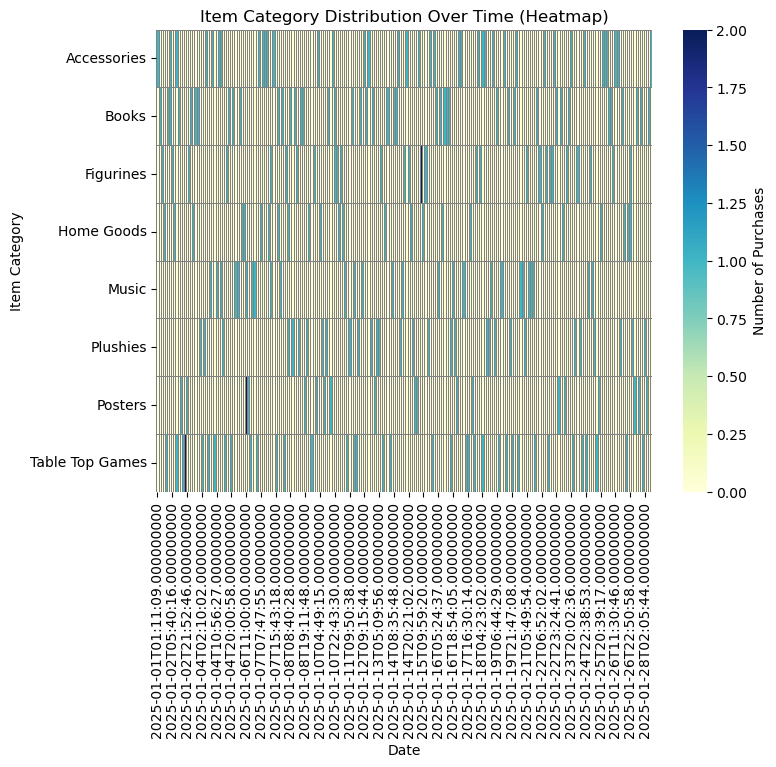

In [68]:
# Pivot the table for heatmap visualization 

pivot_table = item_category_distribution_per_date.pivot(index='itemCategory', columns='date', values='Count').fillna(0)

#Visualization: Heatmap of Item Category Distribution Over Time 
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, linecolor='gray', cbar_kws={'label' : 'Number of Purchases'})
plt.xlabel('Date')
plt.ylabel('Item Category')
plt.title('Item Category Distribution Over Time (Heatmap)')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Step 6: Relationship between Dates and Prices

date_price_relationship = merged_df.groupby('date')['itemPrice'].sum().reset_index()
date_price_relationship.head(3)

,date,itemPrice
0,2025-01-01 00:08:39,0.0
1,2025-01-01 00:10:27,0.0
2,2025-01-01 00:22:37,0.0


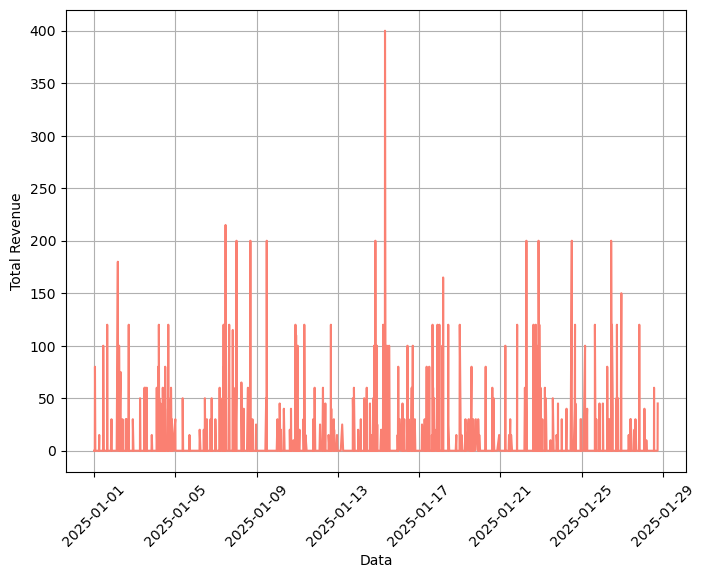

In [72]:
# Visualization: Relationship between Dates and Prices

plt.figure(figsize=(8,6))
plt.plot(date_price_relationship['date'], date_price_relationship['itemPrice'], color='salmon')
plt.xlabel('Data')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [74]:
# Step 7: Distribution of Campaigns with Respect to Dates

campaign_distribution_per_date = merged_df.groupby(['date', 'Campaign Name']).size().reset_index(name='Count')
campaign_distribution_per_date.head(3)

,date,Campaign Name,Count
0,2025-01-01 00:08:39,Aeris Weekend Deals,1
1,2025-01-01 00:10:27,Summon Savings,1
2,2025-01-01 00:22:37,ChocoBOGO,1


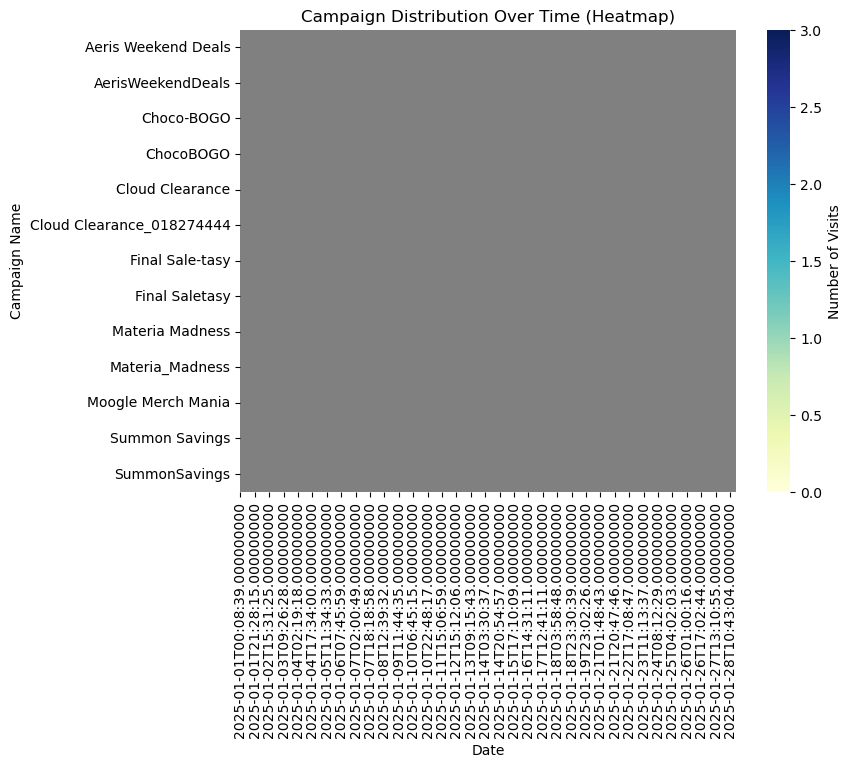

In [76]:
# Visualization: Distribution of Campaigns with Respect to Dates (Heatmap)

pivot_campaign = campaign_distribution_per_date.pivot(index='Campaign Name', columns='date', values='Count').fillna(0)
plt.figure(figsize=(8,6))
sns.heatmap(pivot_campaign, cbar_kws={'label': 'Number of Visits'}, cmap="YlGnBu", linewidths=0.5, linecolor='gray',)
plt.xlabel('Date')
plt.ylabel('Campaign Name')
plt.title('Campaign Distribution Over Time (Heatmap)')
plt.xticks(rotation=90)
plt.show()

In [79]:
# Step 8: Distribution of Sources with Respect to Dates

source_distribution_per_date = merged_df.groupby(['date', 'source']).size().reset_index(name='Count')
source_distribution_per_date.head(3)

,date,source,Count
0,2025-01-01 00:08:39,Paid Search,1
1,2025-01-01 00:10:27,Social,1
2,2025-01-01 00:22:37,Email,1


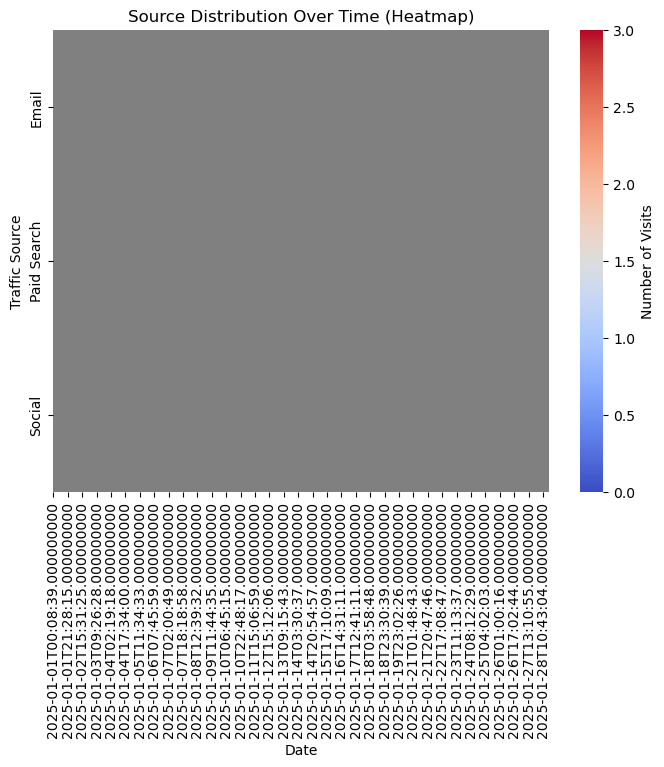

In [81]:
# Visualization: Distribution of Sources with Respect to Dates (Heatmap)

pivot_source = source_distribution_per_date.pivot(index='source', columns='date', values='Count').fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_source,cmap="coolwarm", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Number of Visits'})
plt.xlabel('Date')
plt.ylabel('Traffic Source')
plt.title('Source Distribution Over Time (Heatmap)')
plt.xticks(rotation=90)
plt.show()


In [82]:
# Step 9: Distribution of Platforms with Respect to Dates

platform_distribution_per_date = merged_df.groupby(['date', 'platform']).size().reset_index(name='Count')
platform_distribution_per_date 
                                                                                            

,date,platform,Count
0,2025-01-01 00:08:39,Google,1
1,2025-01-01 00:10:27,FB,1
2,2025-01-01 00:22:37,Email,1
3,2025-01-01 00:59:05,Bing,1
4,2025-01-01 01:00:33,Bing,1
...,...,...,...
1995,2025-01-28 15:32:31,Google,1
1996,2025-01-28 17:17:18,Google,1
1997,2025-01-28 17:38:12,Bing,1
1998,2025-01-28 17:39:50,Email,1


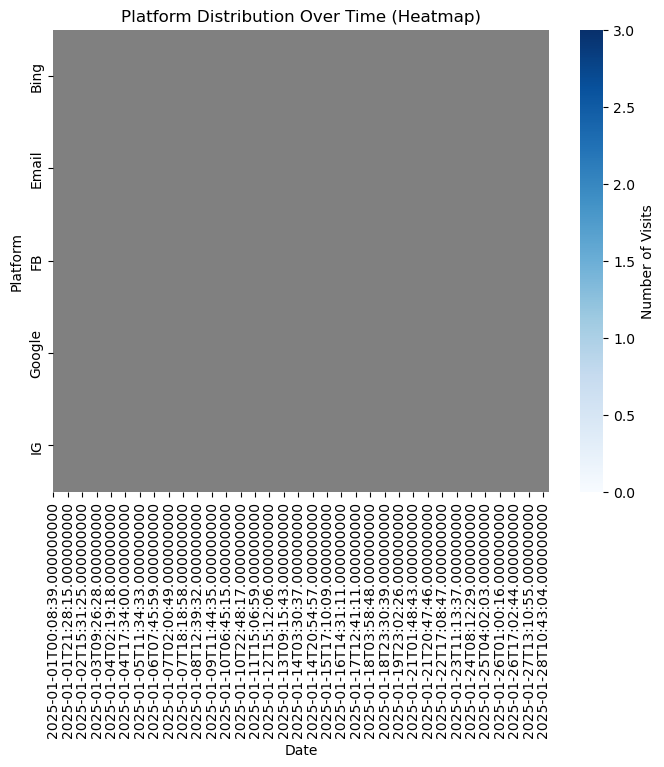

In [84]:
# Visualization: Distribution of Platforms with Respect to Dates (Heatmap)

pivot_platform = platform_distribution_per_date.pivot(index='platform', columns='date', values='Count').fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_platform, cmap="Blues", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Number of Visits'})
plt.xlabel('Date')
plt.ylabel('Platform')
plt.title('Platform Distribution Over Time (Heatmap)')
plt.xticks(rotation=90)
plt.show()

In [86]:
# Add a new column for Day of the Week

merged_df['day_of_week'] = merged_df['date'].dt.day_name()

# Distribution of Day of the Week

day_of_week_distribution = merged_df['day_of_week'].value_counts().reset_index()
day_of_week_distribution.columns = ['Day of Week', 'Count']
day_of_week_distribution

,Day of Week,Count
0,Friday,319
1,Saturday,301
2,Tuesday,289
3,Wednesday,281
4,Sunday,280
5,Thursday,274
6,Monday,271


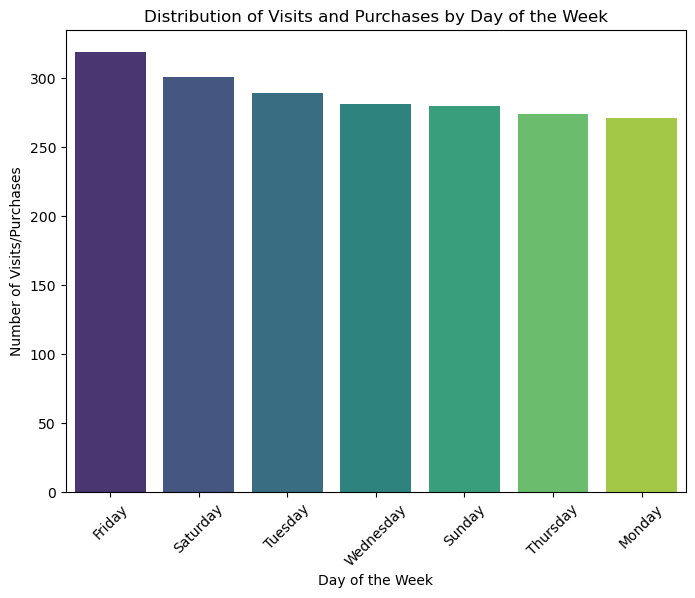

In [89]:
# Visualization: Distribution of Visits by Day of the Week

plt.figure(figsize=(8,6))
sns.barplot(x=day_of_week_distribution['Day of Week'], y=day_of_week_distribution['Count'], palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Visits/Purchases')
plt.title('Distribution of Visits and Purchases by Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [90]:
# Create a new column for time buckets

# Create a new column for time buckets
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Midnight - Early Morning (12 AM - 6 AM)'
    elif 6 <= hour < 12:
        return 'Morning (6 AM - 12 PM)'
    elif 12 <= hour < 18:
        return 'Afternoon (12 PM - 6 PM)'
    else:
        return 'Evening - Night (6 PM - 12 AM)'

# Extract hour and categorize into buckets
merged_df['time_bucket'] = merged_df['date'].dt.hour.apply(categorize_time)

In [94]:
# Count the number of visits/purchases in each time bucket

time_bucket_distribution = merged_df['time_bucket'].value_counts().reset_index()

time_bucket_distribution

,time_bucket,count
0,Afternoon (12 PM - 6 PM),540
1,Morning (6 AM - 12 PM),511
2,Evening - Night (6 PM - 12 AM),510
3,Midnight - Early Morning (12 AM - 6 AM),454


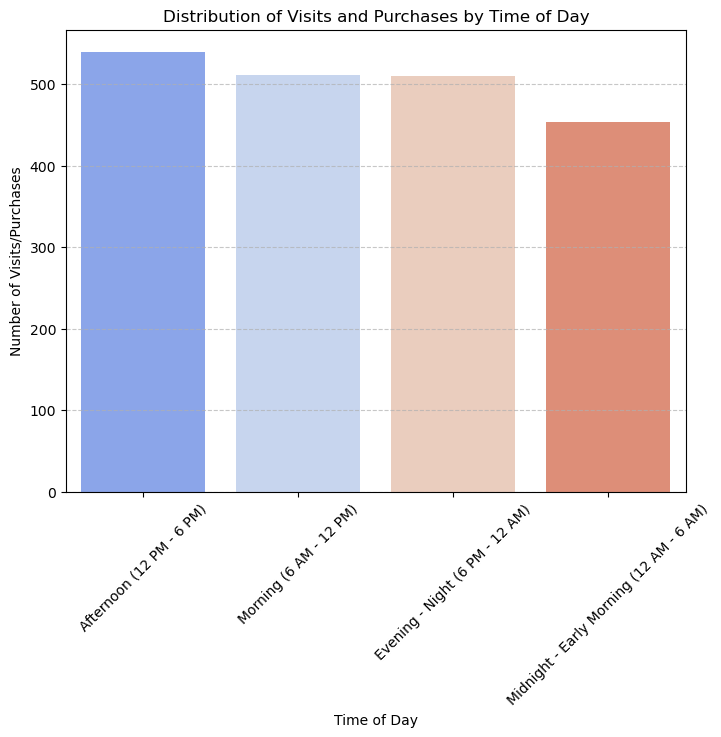

In [99]:
# Visualization: Distribution of Visits and Purchases by Time Bucket
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x=time_bucket_distribution['time_bucket'], y=time_bucket_distribution['count'], palette='coolwarm')
plt.xlabel('Time of Day')
plt.ylabel('Number of Visits/Purchases')
plt.title('Distribution of Visits and Purchases by Time of Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### II. USER ID Analysis 

In [100]:
# 1. Total Unique Users

total_unique_users = merged_df['UserID'].nunique()
total_unique_users 

2000

In [104]:
# 2. User-Category Relationship (How many times each user bought from each category)
user_category_relationship = merged_df.groupby(['UserID', 'itemCategory']).size().reset_index(name='Purchase Count')
user_category_relationship.head(3)

,UserID,itemCategory,Purchase Count
0,110155,Plushies,1
1,1158599,Books,1
2,1413160,Plushies,1


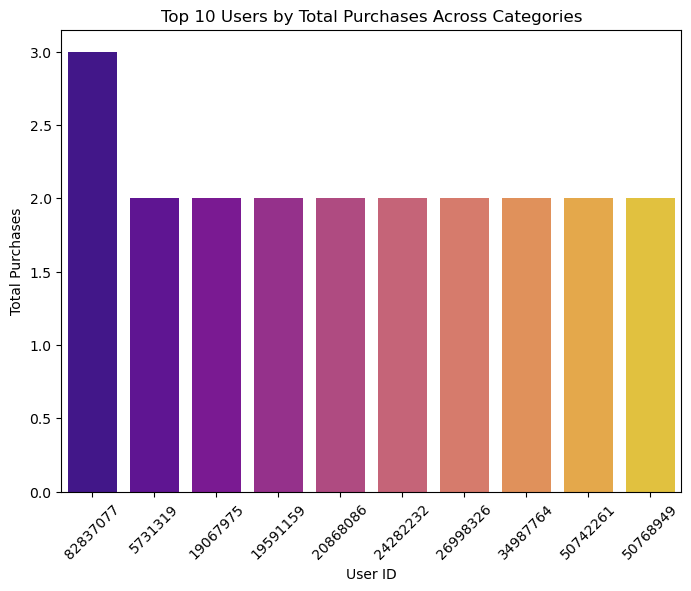

In [107]:
# Select top 10 users with the highest total purchases
top_users_by_category = user_category_relationship.groupby('UserID')['Purchase Count'].sum().nlargest(10).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=top_users_by_category['UserID'].astype(str), y=top_users_by_category['Purchase Count'], palette='plasma')
plt.xlabel('User ID')
plt.ylabel('Total Purchases')
plt.title('Top 10 Users by Total Purchases Across Categories')
plt.xticks(rotation=45)
plt.show()


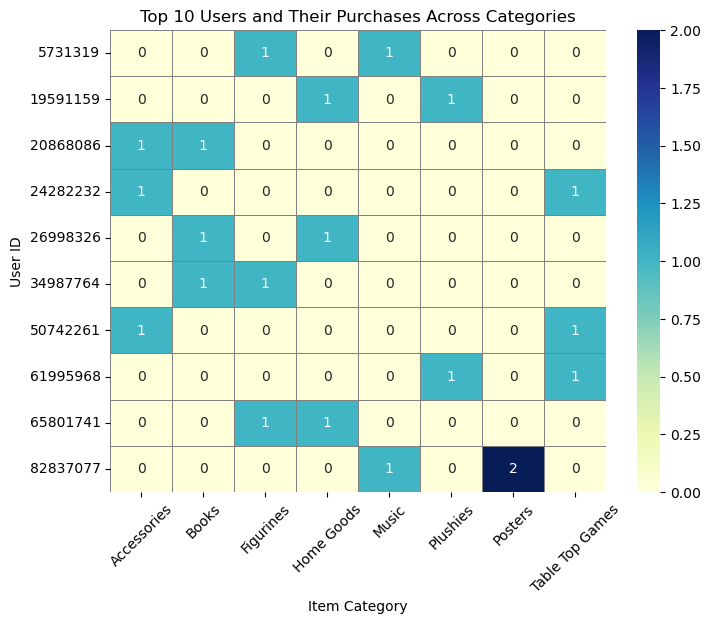

In [109]:
# Heatmap of User-Category Purchases (Only Showing Top 10 Users for Better Visualization)
top_10_users = user_category_relationship['UserID'].value_counts().nlargest(10).index
filtered_user_category_relationship = user_category_relationship[user_category_relationship['UserID'].isin(top_10_users)]

pivot_user_category = filtered_user_category_relationship.pivot(index='UserID', columns='itemCategory', values='Purchase Count').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_user_category, cmap="YlGnBu", linewidths=0.5, linecolor='gray', annot=True, fmt="g")
plt.xlabel('Item Category')
plt.ylabel('User ID')
plt.title('Top 10 Users and Their Purchases Across Categories')
plt.xticks(rotation=45)
plt.show()

In [112]:
# Medium,High, No Price - Relationship 

# Create a new column for Medium-High Item Price Categorization
def categorize_medium_high(price):
    if pd.isna(price):
        return 'No Purchase'
    elif price < 50:
        return 'Medium'
    else:
        return 'High'
    
    
# Apply categorization
merged_df['medium_high_price_category'] = merged_df['itemPrice'].apply(categorize_medium_high)

# Relationship between Users and Medium-High Price Category
user_medium_high_price_relationship = merged_df.groupby(['UserID', 'medium_high_price_category']).size().reset_index(name='Count')

user_medium_high_price_relationship.head(2)

,UserID,medium_high_price_category,Count
0,11915,No Purchase,1
1,23308,No Purchase,1


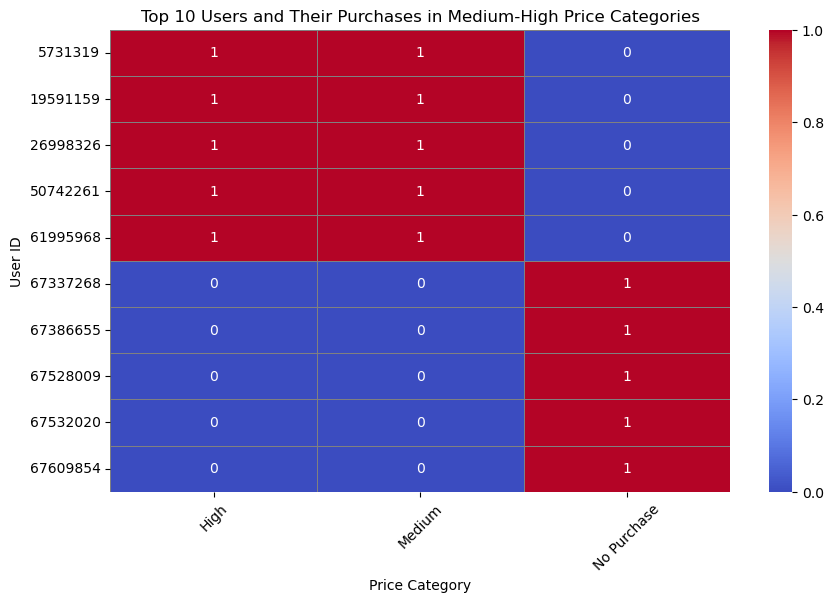

In [114]:
# Heatmap: User-Medium High Price Category Relationship (Only Showing Top 10 Users for Better Visualization)
top_10_users = user_medium_high_price_relationship['UserID'].value_counts().nlargest(10).index
filtered_user_price_relationship = user_medium_high_price_relationship[user_medium_high_price_relationship['UserID'].isin(top_10_users)]

pivot_user_price = filtered_user_price_relationship.pivot(index='UserID', columns='medium_high_price_category', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_user_price, cmap="coolwarm", linewidths=0.5, linecolor='gray', annot=True, fmt="g")
plt.xlabel('Price Category')
plt.ylabel('User ID')
plt.title('Top 10 Users and Their Purchases in Medium-High Price Categories')
plt.xticks(rotation=45)
plt.show()

In [116]:
# Relationship between Source Name and User ID
source_user_relationship = merged_df.groupby(['source', 'UserID']).size().reset_index(name='Count')
source_user_relationship.head(3)

,source,UserID,Count
0,Email,53961,1
1,Email,110155,1
2,Email,211298,1


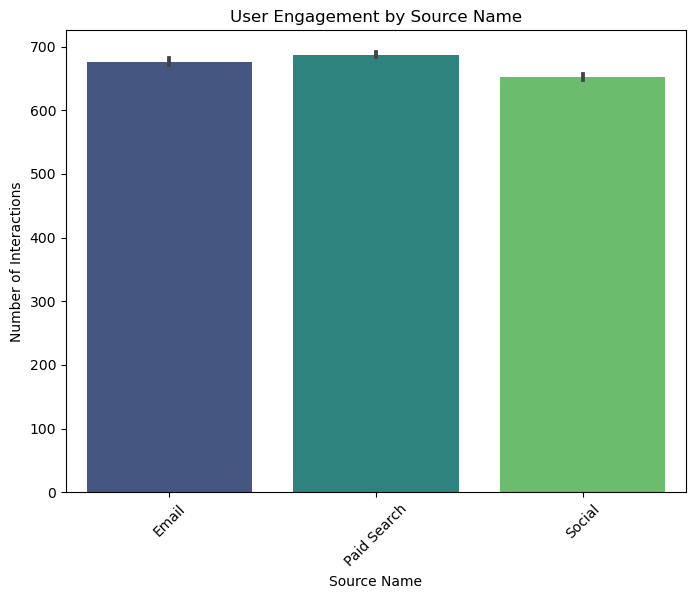

In [118]:
# Visualization: Bar Chart of Source-User Relationship
plt.figure(figsize=(8,6))
sns.barplot(x=source_user_relationship['source'], y=source_user_relationship['Count'], palette='viridis', estimator=sum)
plt.xlabel('Source Name')
plt.ylabel('Number of Interactions')
plt.title('User Engagement by Source Name')
plt.xticks(rotation=45)
plt.show()

In [120]:
# Relationship between Platform and User ID

platform_user_relationship = merged_df.groupby(['platform', 'UserID']).size().reset_index(name='Count')
platform_user_relationship.head(3)

,platform,UserID,Count
0,Bing,67656,1
1,Bing,246873,1
2,Bing,704635,1


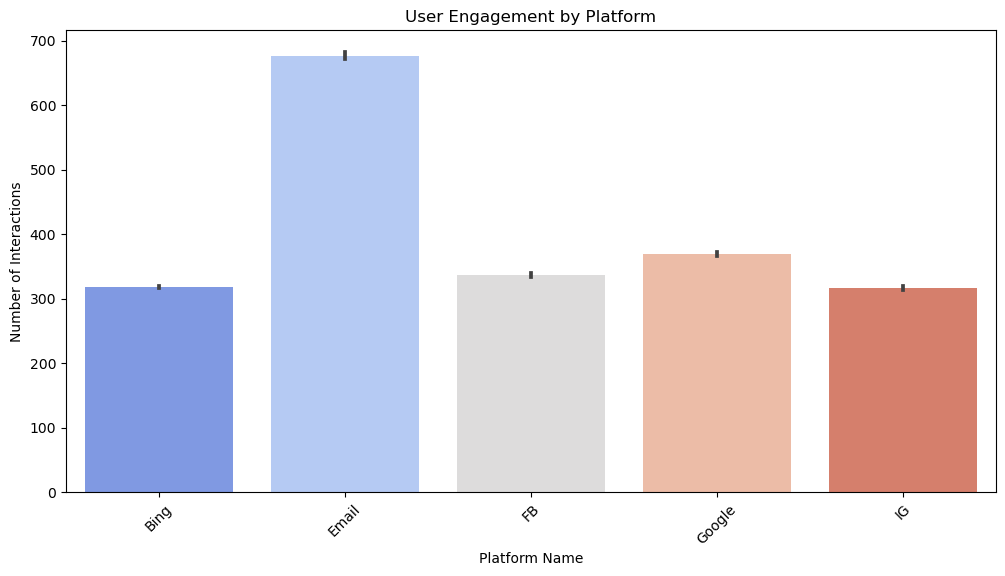

In [122]:

# Visualization: Bar Chart for Platform-User Relationship
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_user_relationship['platform'], y=platform_user_relationship['Count'], palette='coolwarm', estimator=sum)
plt.xlabel('Platform Name')
plt.ylabel('Number of Interactions')
plt.title('User Engagement by Platform')
plt.xticks(rotation=45)
plt.show()

In [124]:
# Relationship between Device and User ID
device_user_relationship = merged_df.groupby(['device', 'UserID']).size().reset_index(name='Count')
device_user_relationship.head(3)

,device,UserID,Count
0,desktop,23308,1
1,desktop,67656,1
2,desktop,110155,1


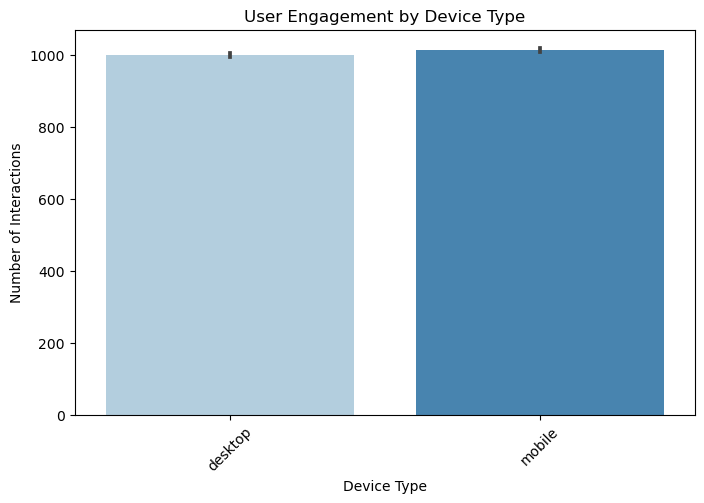

In [125]:
# Visualization: Bar Chart for Device-User Relationship
plt.figure(figsize=(8, 5))
sns.barplot(x=device_user_relationship['device'], y=device_user_relationship['Count'], palette='Blues', estimator=sum)
plt.xlabel('Device Type')
plt.ylabel('Number of Interactions')
plt.title('User Engagement by Device Type')
plt.xticks(rotation=45)
plt.show()

In [126]:
# Relationship between User ID and Time Spent on Site
user_time_spent_relationship = merged_df.groupby('UserID')['timeOnSite'].sum().reset_index()
user_time_spent_relationship.head(2)

,UserID,timeOnSite
0,11915,68
1,23308,363


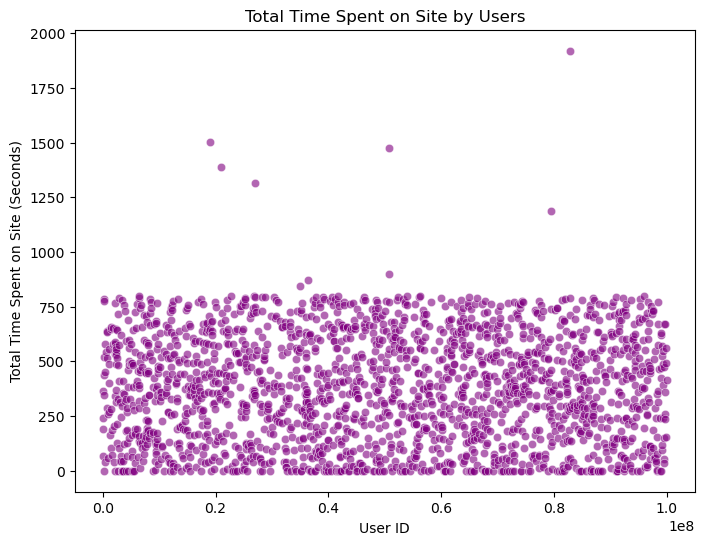

In [127]:
# Visualization: Scatter Plot for User ID vs. Total Time Spent
plt.figure(figsize=(8, 6))
sns.scatterplot(x=user_time_spent_relationship['UserID'], y=user_time_spent_relationship['timeOnSite'], alpha=0.6, color='purple')
plt.xlabel('User ID')
plt.ylabel('Total Time Spent on Site (Seconds)')
plt.title('Total Time Spent on Site by Users')
plt.show()